In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
# convert 2D Array into 1D Array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

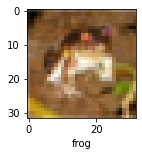

In [9]:
plot_sample(X_train, y_train, 0)

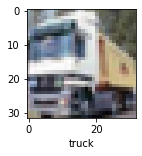

In [10]:
plot_sample(X_train, y_train, 1)

In [11]:
# Normalize image from 0 to 1
# color into 0 ~ 1 ( r,g,b )
X_train = X_train / 255.0
X_test = X_test   / 255.0

In [14]:
# build ANN -- takes a long time
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        # multiple classification ---> soft max
        layers.Dense(10,activation='softmax')
])
ann.compile(optimizer = 'SGD',
            # 만약, y가 one hot encoded 되어서
            # 1차원 벡터 형태였다면 sparse X
            # 그런데 만일 y가 9,8 등의 하나의 value라면
            # sparse를 붙여야 한다 
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 97s 61ms/step - loss: 1.8136 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.6251 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.5445 - accuracy: 0.4554
Epoch 4/5
1563/1563 [==============================] - 96s 61ms/step - loss: 1.4852 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 96s 62ms/step - loss: 1.4347 - accuracy: 0.4932


In [16]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 24ms/step - loss: 1.5961 - accuracy: 0.4456


[1.5960766077041626, 0.4456000030040741]

In [15]:
# accuracy 49% at 5 epochs
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
# 왜 np.argmax ? return 형태가 확률 의 1차원 vector 이기 때문에
# 그 중에서 가장 높은 확률을 지니는 idx 정보를 return 받는다 
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.62      0.53      1000
           1       0.73      0.42      0.53      1000
           2       0.32      0.44      0.37      1000
           3       0.43      0.09      0.15      1000
           4       0.33      0.45      0.38      1000
           5       0.37      0.42      0.39      1000
           6       0.35      0.76      0.48      1000
           7       0.68      0.33      0.44      1000
           8       0.66      0.54      0.59      1000
           9       0.66      0.41      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [ ]:
# CNN
# 1.Convolutional : detecting features 
# 2.Relu
# 3.Poolilng
# 4.NetWork

In [20]:
cnn = models.Sequential([                         
      # cnn ---
      # filter 개수와, filter의 크기
      layers.Conv2D(
          filters = 32,
          activation = 'relu',
          kernel_size = (3,3),
          # info of one image 
          input_shape = (32,32,3)),
      layers.MaxPooling2D((2,2)),

      # multiple layer를 만들 수도 있다.
      layers.Conv2D(
          filters = 64,
          activation = 'relu',
          kernel_size = (3,3),
          # info of one image 
          input_shape = (32,32,3)),
      layers.MaxPooling2D((2,2)),
                         
      # dense network ---
      # layers.Flatten(input_shape=(32,32,3)),
      layers.Flatten(),
      layers.Dense(64,activation='relu'),
      # sigmoid는 normalize probability 
      # ex) 1:0.45, 2:0.67
      # 즉, 합이 항상 1은 아니다
      # softmax는 전체 sum 중의 확률 개념
      # ex) 0.67 / 0.45 + 0.67
      # 합이 항상 1
      layers.Dense(10,activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# take long long time
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4756 - accuracy: 0.4699
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1319 - accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0049 - accuracy: 0.6520
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9269 - accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8638 - accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8114 - accuracy: 0.7187
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7671 - accuracy: 0.7345
Epoch 8/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.7237 - accuracy: 0.7484
Epoch 9/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.6852 - accuracy: 0.7630
Epoch 10/10
1563/1563 [==============================] - 60s 39m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.8870 - accuracy: 0.7056


[0.8870255947113037, 0.7056000232696533]

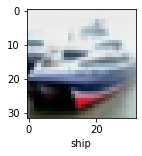

In [24]:
# convert into 1 dimension
y_test = y_test.reshape(-1,)
y_test[:5]

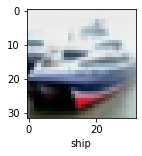

In [25]:
plot_sample(X_test,y_test,1)

In [28]:
y_pred = cnn.predict(X_test)

In [29]:
y_classes = [np.argmax(elem) for elem in y_pred]

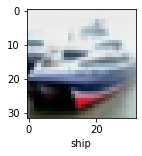

In [31]:
plot_sample(X_test,y_test,1)

In [ ]:
classes

In [32]:
classes[y_classes[1]] 

'ship'